## EDA analysis for *Anonymized Implementation Tickets Dataset (anonymized_hubspot_tickets.csv)*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load data
path = "/Users/annalorenz/Documents/Uni/Vanderbilt/02_Courses/spring2025/Machine_learning/project/data/anonymized_hubspot_tickets.csv"
df = pd.read_csv(path)

In [3]:
print("\n Dataset Overview:")
print(df.info())


 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 46 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Create date                                    79 non-null     object 
 1   Ticket Tags                                    0 non-null      float64
 2   Stage Date - Project Launch                    31 non-null     object 
 3   Associated Contact                             78 non-null     object 
 4   Category                                       0 non-null      float64
 5   Target Launch Date                             29 non-null     object 
 6   Kickoff Call                                   49 non-null     object 
 7   Close date                                     55 non-null     object 
 8   Pipeline                                       79 non-null     object 
 9   Stage Date - Project Initiation     

In [4]:
df.columns

Index(['Create date', 'Ticket Tags', 'Stage Date - Project Launch',
       'Associated Contact', 'Category', 'Target Launch Date', 'Kickoff Call',
       'Close date', 'Pipeline', 'Stage Date - Project Initiation',
       'Stage Date - Planning Phase', 'Ticket status',
       'Stage Date - Execution', 'Time to first agent email reply (HH:mm:ss)',
       'Last CES survey rating', 'Priority', 'Associated Company',
       'Who will be creating the Syms?', 'Stage Date - Closure Phase',
       'Stage Date - Monitoring and Control Phase',
       'Associated Company (Primary)', 'Response time (HH:mm:ss)', 'Ticket ID',
       'Time to close (HH:mm:ss)', 'Associated Deal', 'Library index approved',
       'Training: General Overview', 'Latest Milestone',
       'Training: Deployment/User Management Training',
       'Requirements for the Trial', 'Training: Sym Building 101',
       'Last modified date', 'Type', 'Trial End Date',
       'Training: Sym Building 201', 'Stage Date - Converted Won',

In [5]:
# Remove columns with more than 80% missing data 
threshold = 0.8
missing_ratio = df.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > threshold].index
df_cleaned = df.drop(columns=columns_to_drop)


In [6]:
# Convert date columns to datetime format
date_cols = ['Create date', 
             'Stage Date - Project Launch', 
             'Target Launch Date', 
             'Kickoff Call', 
             'Close date', 
             'Stage Date - Project Initiation', 
             'Stage Date - Execution', 
             'Stage Date - Closure Phase', 
             'Stage Date - Converted Won', 
             'Latest Milestone Update Date', 
             'Training: Deployment/User Management Training',
             'Training: Sym Building 101',
             'Training: Sym Building 201',
             'Training: General Overview',
             'Trial Start Date', 
             'Trial End Date',
             '1st Syms presented for review', 
             'Project Launch Day', 
             'Training: Reporting', 
             'Construction of 1st Sym begun', 
             'Last modified date']
for col in date_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')


In [7]:
# Convert time variables to numeric
time_cols = ['Time to first agent email reply (HH:mm:ss)', 'Time to close (HH:mm:ss)', 'Response time (HH:mm:ss)']

for col in time_cols:
    df_cleaned[col] = pd.to_timedelta(df_cleaned[col], errors='coerce')


In [8]:
# Convert Ticket ID to categorical variable
df_cleaned['Ticket ID'] = df_cleaned['Ticket ID'].astype('category')

### Summary statistics (mean, median, standard devision)

In [9]:
display(df_cleaned.describe(include='all'))

,Create date,Stage Date - Project Launch,Associated Contact,Target Launch Date,Kickoff Call,Close date,Pipeline,Stage Date - Project Initiation,Ticket status,Stage Date - Execution,...,Training: Sym Building 201,Stage Date - Converted Won,Latest Milestone Update Date,Ticket name,Trial Overview,Trial Start Date,1st Syms presented for review,Project Launch Day,Training: Reporting,Construction of 1st Sym begun
count,79,31,78,29,49,55,79,53,79,37,...,19,30,20,79,65,52,21,34,24,43
unique,NaN,NaN,74,NaN,NaN,NaN,1,NaN,8,NaN,...,NaN,NaN,NaN,79,64,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Contact_80789466,NaN,NaN,NaN,Project Success Plan,NaN,Converted-Won,NaN,...,NaN,NaN,NaN,Ticket_4baf7886,With the help of Symtrain will be focusing on ...,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,NaN,NaN,79,NaN,30,NaN,...,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN
mean,2024-05-31 12:48:44.050633216,2024-06-24 03:52:15.483870976,NaN,2024-01-10 22:20:41.379310336,2024-04-23 12:14:41.632653056,2024-07-15 20:03:30.545454336,NaN,2024-08-20 03:37:21.509433856,NaN,2024-08-16 07:08:06.486486528,...,2024-05-17 06:18:56.842105344,2024-08-19 16:48:00,2024-02-06 01:12:00,NaN,NaN,2024-08-02 10:36:55.384615424,2024-06-06 05:42:51.428571392,2024-05-01 13:24:42.352941056,2024-04-04 18:00:00,2024-06-18 21:12:33.488371968
min,2023-06-01 15:14:00,2023-12-08 00:00:00,NaN,2023-09-02 00:00:00,2023-01-11 00:00:00,2023-10-24 10:51:00,NaN,2023-12-05 00:00:00,NaN,2023-12-05 00:00:00,...,2023-08-01 00:00:00,2023-12-14 00:00:00,2023-11-24 00:00:00,NaN,NaN,2023-11-01 00:00:00,2023-11-03 00:00:00,2023-06-08 00:00:00,2023-06-21 00:00:00,2023-10-02 00:00:00
25%,2024-01-24 11:42:00,2024-03-23 00:00:00,NaN,2023-10-02 00:00:00,2023-11-16 00:00:00,2024-03-19 10:12:00,NaN,2024-05-20 00:00:00,NaN,2024-06-17 00:00:00,...,2023-12-19 00:00:00,2024-05-25 00:00:00,2023-11-24 00:00:00,NaN,NaN,2024-04-15 00:00:00,2024-01-01 00:00:00,2023-12-12 06:00:00,2023-11-08 12:00:00,2024-01-09 00:00:00
50%,2024-06-09 22:48:00,2024-07-21 00:00:00,NaN,2023-12-11 00:00:00,2024-05-30 00:00:00,2024-06-27 09:54:00,NaN,2024-08-28 00:00:00,NaN,2024-08-21 00:00:00,...,2024-05-31 00:00:00,2024-09-02 12:00:00,2023-11-24 00:00:00,NaN,NaN,2024-08-01 12:00:00,2024-07-11 00:00:00,2024-06-19 12:00:00,2024-04-28 12:00:00,2024-07-15 00:00:00
75%,2024-11-09 22:37:00,2024-09-30 00:00:00,NaN,2024-04-18 00:00:00,2024-09-16 00:00:00,2024-11-19 08:36:00,NaN,2024-12-13 00:00:00,NaN,2024-12-13 00:00:00,...,2024-09-23 00:00:00,2024-12-26 12:00:00,2024-05-24 00:00:00,NaN,NaN,2024-11-11 00:00:00,2024-09-23 00:00:00,2024-09-21 12:00:00,2024-09-23 00:00:00,2024-10-29 12:00:00
max,2025-02-19 14:45:00,2025-01-13 00:00:00,NaN,2024-07-08 00:00:00,2025-02-11 00:00:00,2025-02-12 15:20:00,NaN,2025-02-19 00:00:00,NaN,2025-02-19 00:00:00,...,2024-12-23 00:00:00,2025-02-06 00:00:00,2024-09-03 00:00:00,NaN,NaN,2025-02-11 00:00:00,2024-12-23 00:00:00,2025-01-06 00:00:00,2024-12-23 00:00:00,2025-02-12 00:00:00


### Feature correlations (heatmap, scatter plots ) for numeric variables

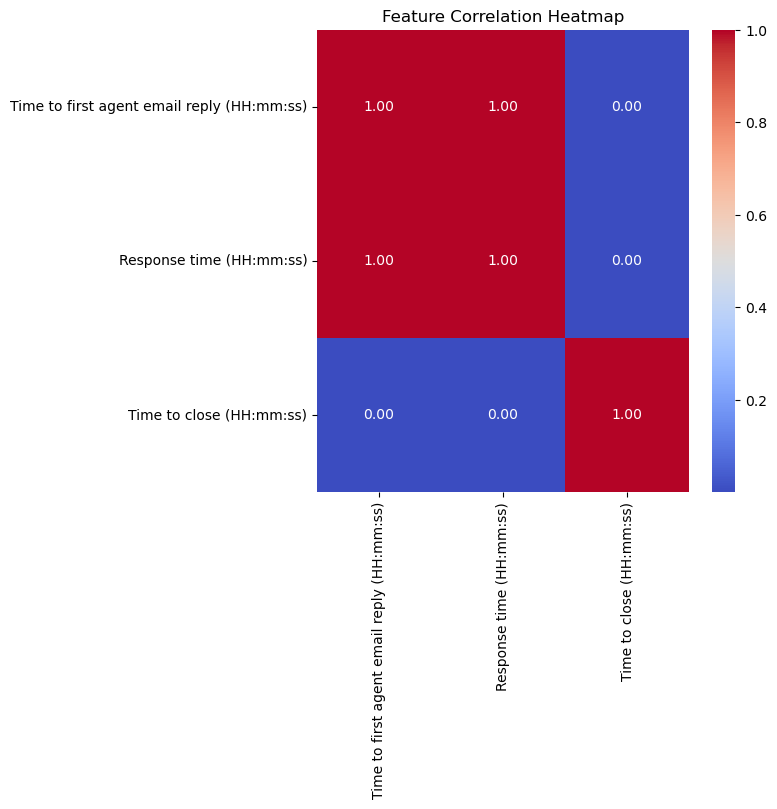

In [15]:
# Feature correlation heatmap (not very meaningful because no numerical variables)
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
plt.figure(figsize=(6,6))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

### Data visualizations 

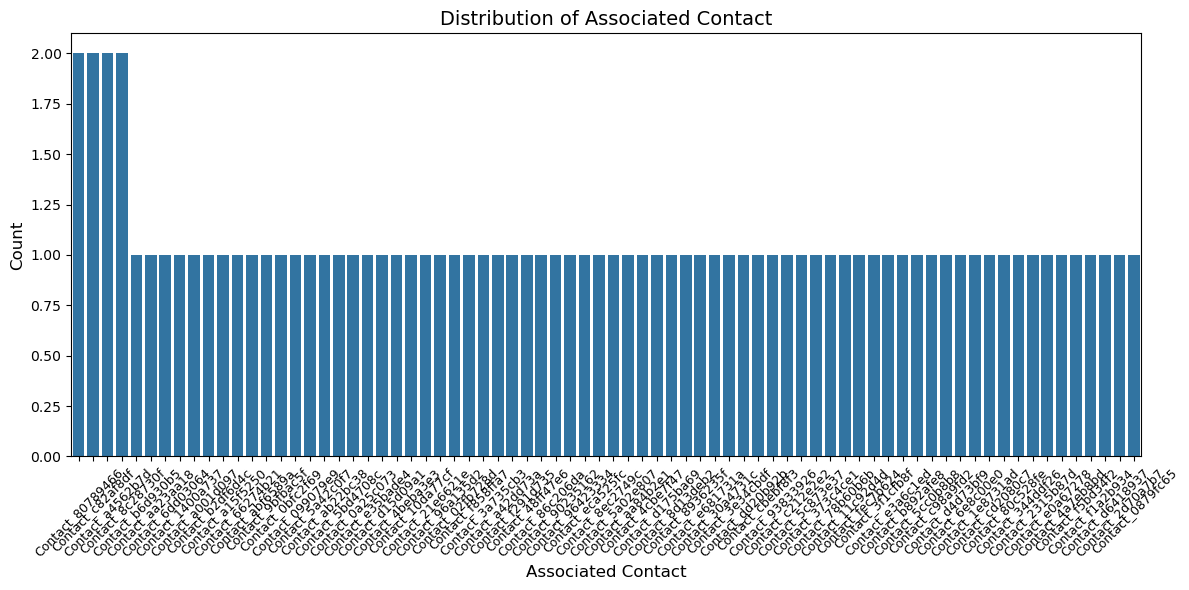

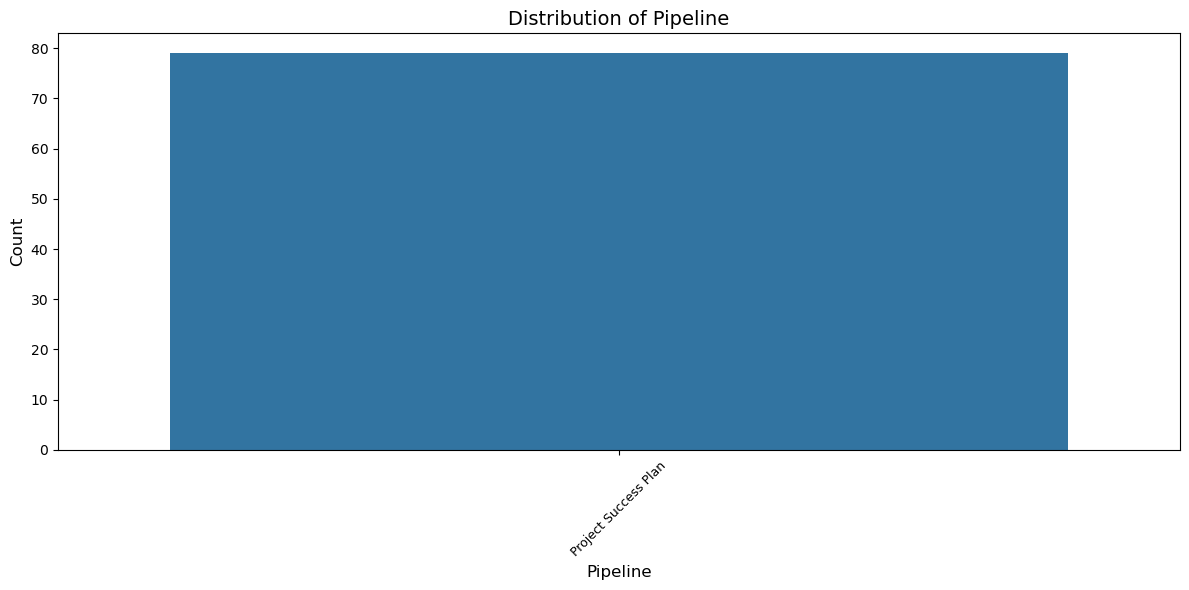

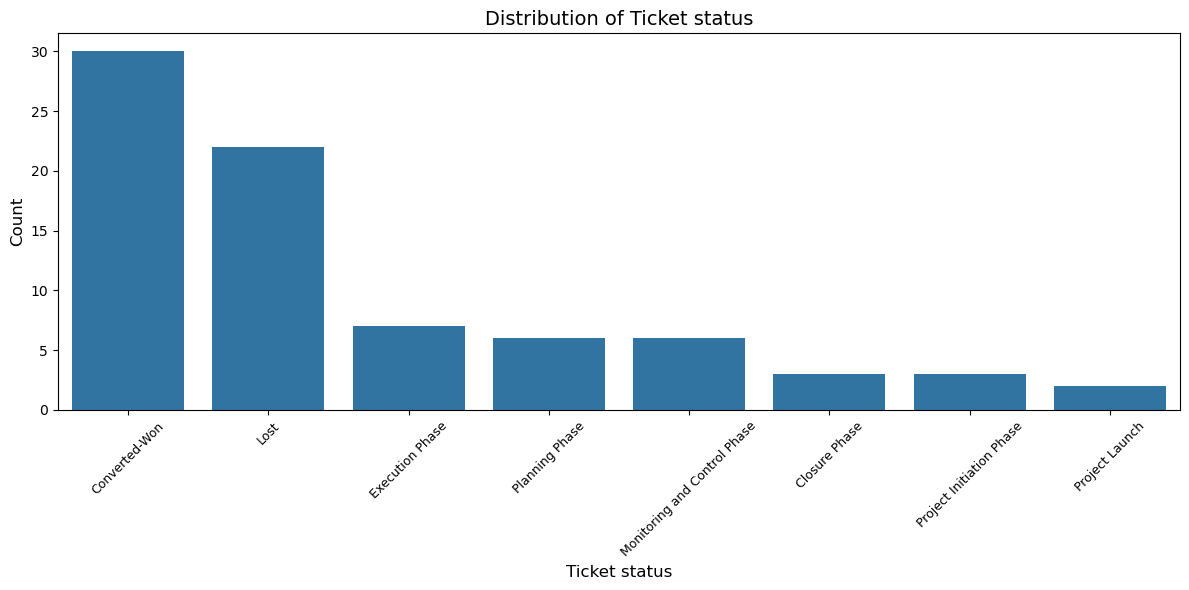

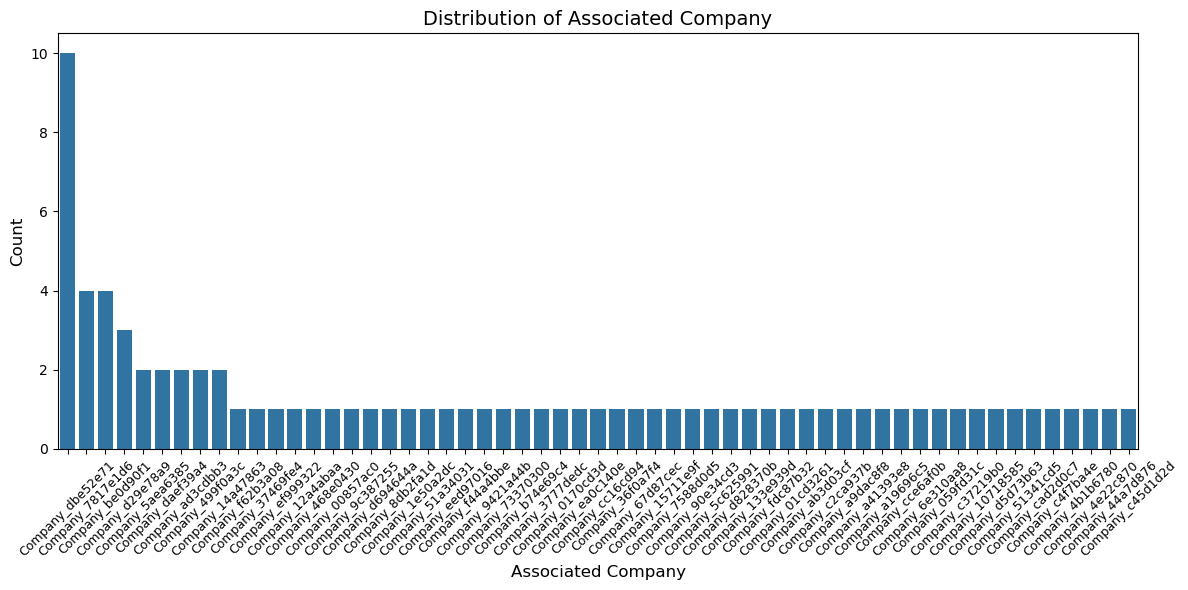

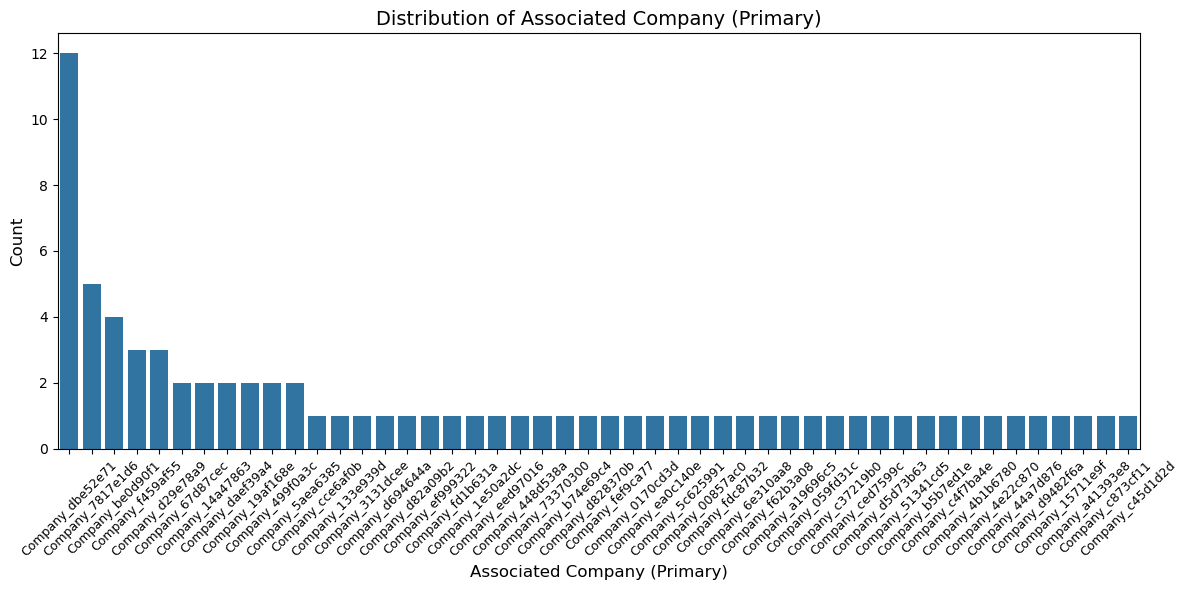

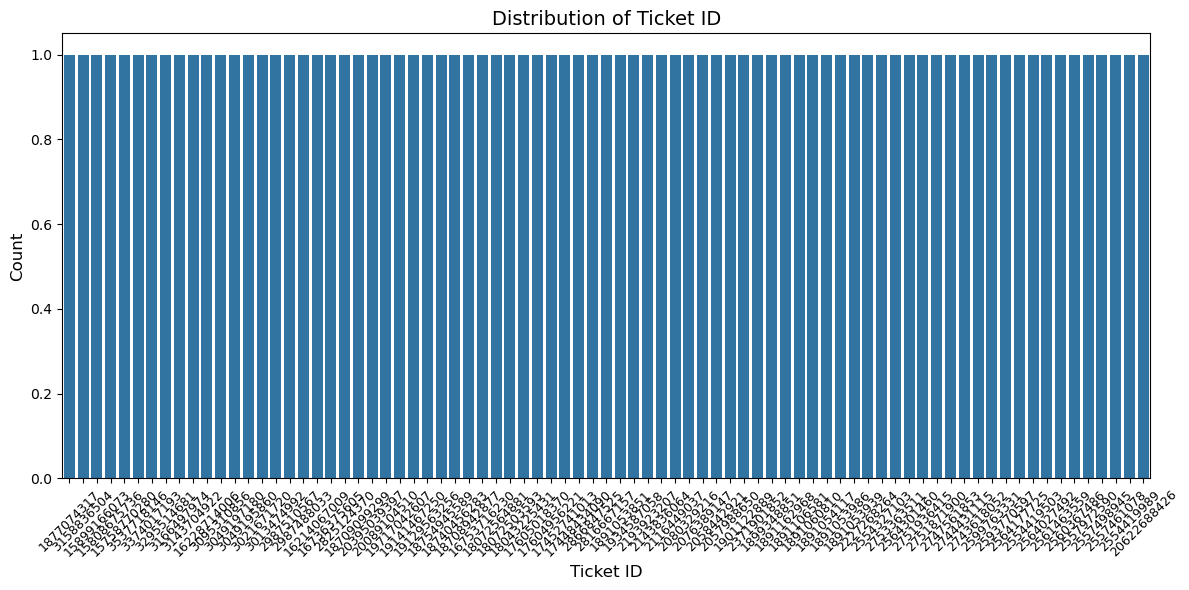

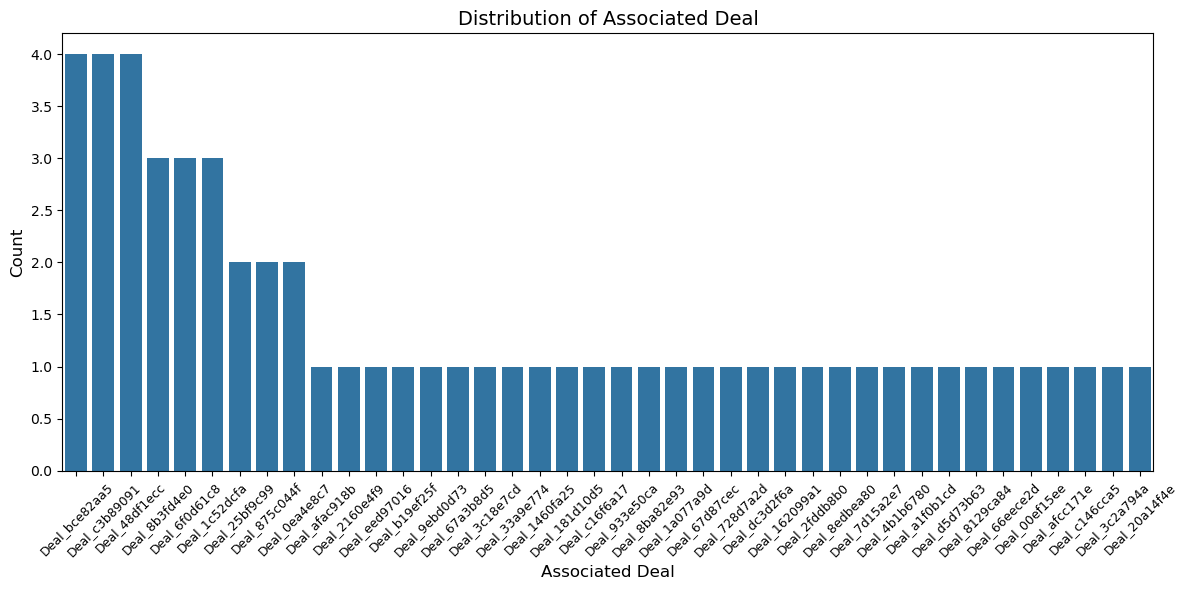

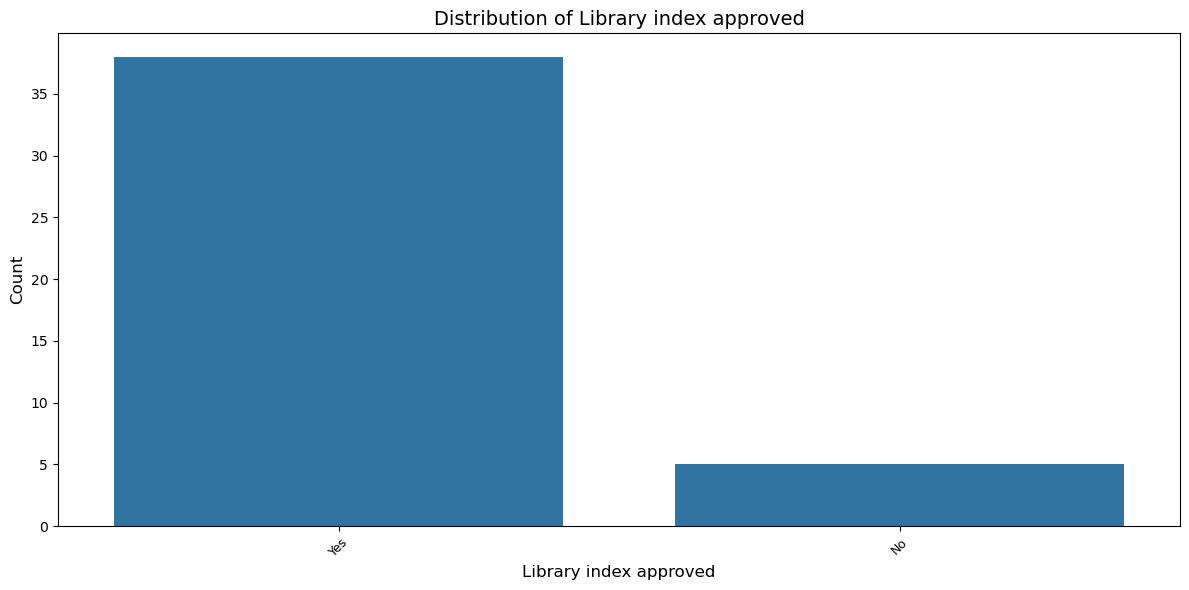

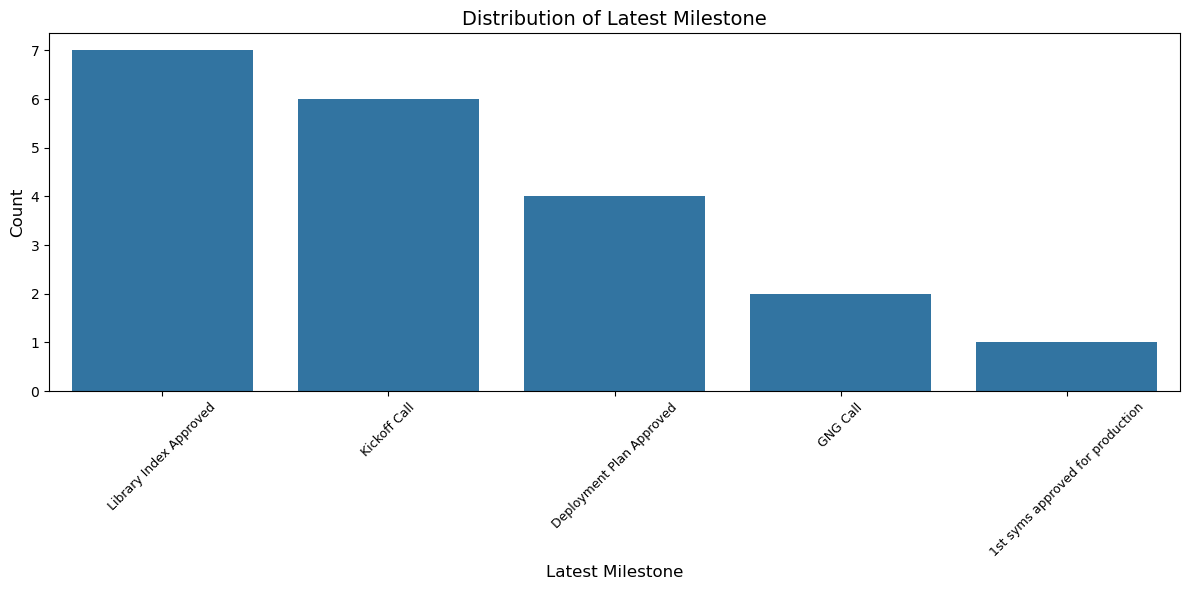

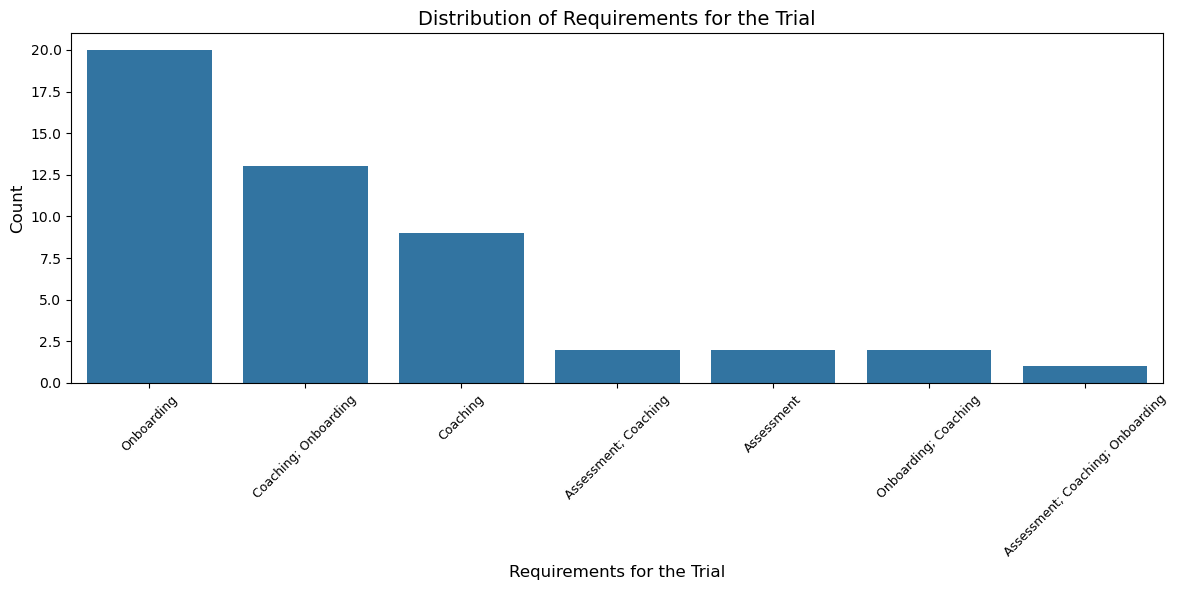

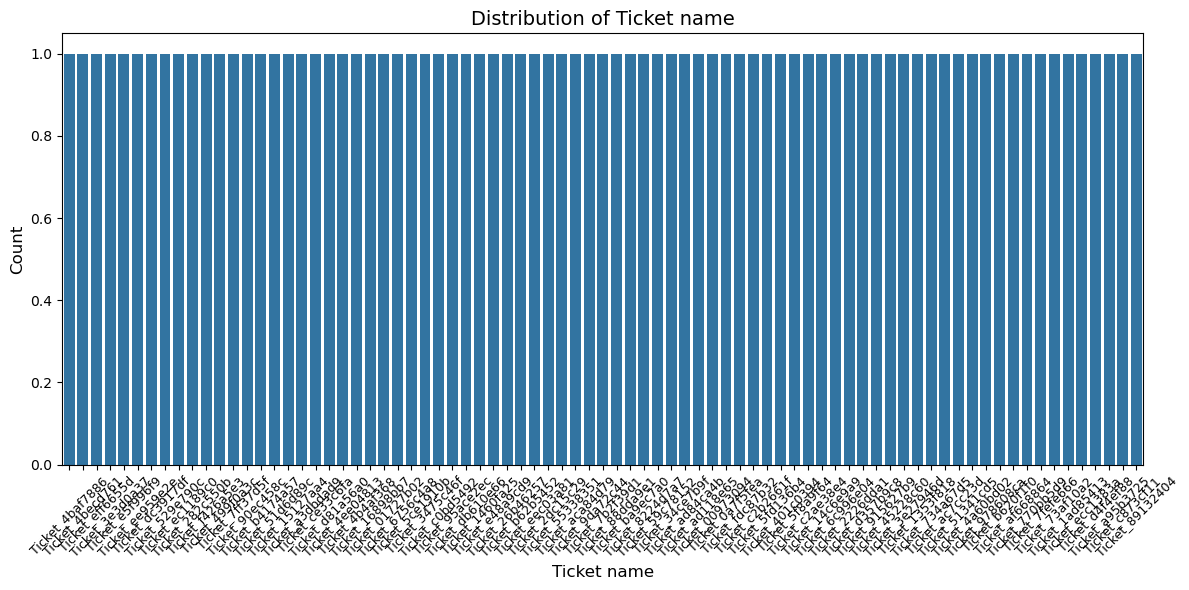

/var/folders/68/4crvzft135s2_qq0dbp6slhw0000gn/T/ipykernel_35449/585697769.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


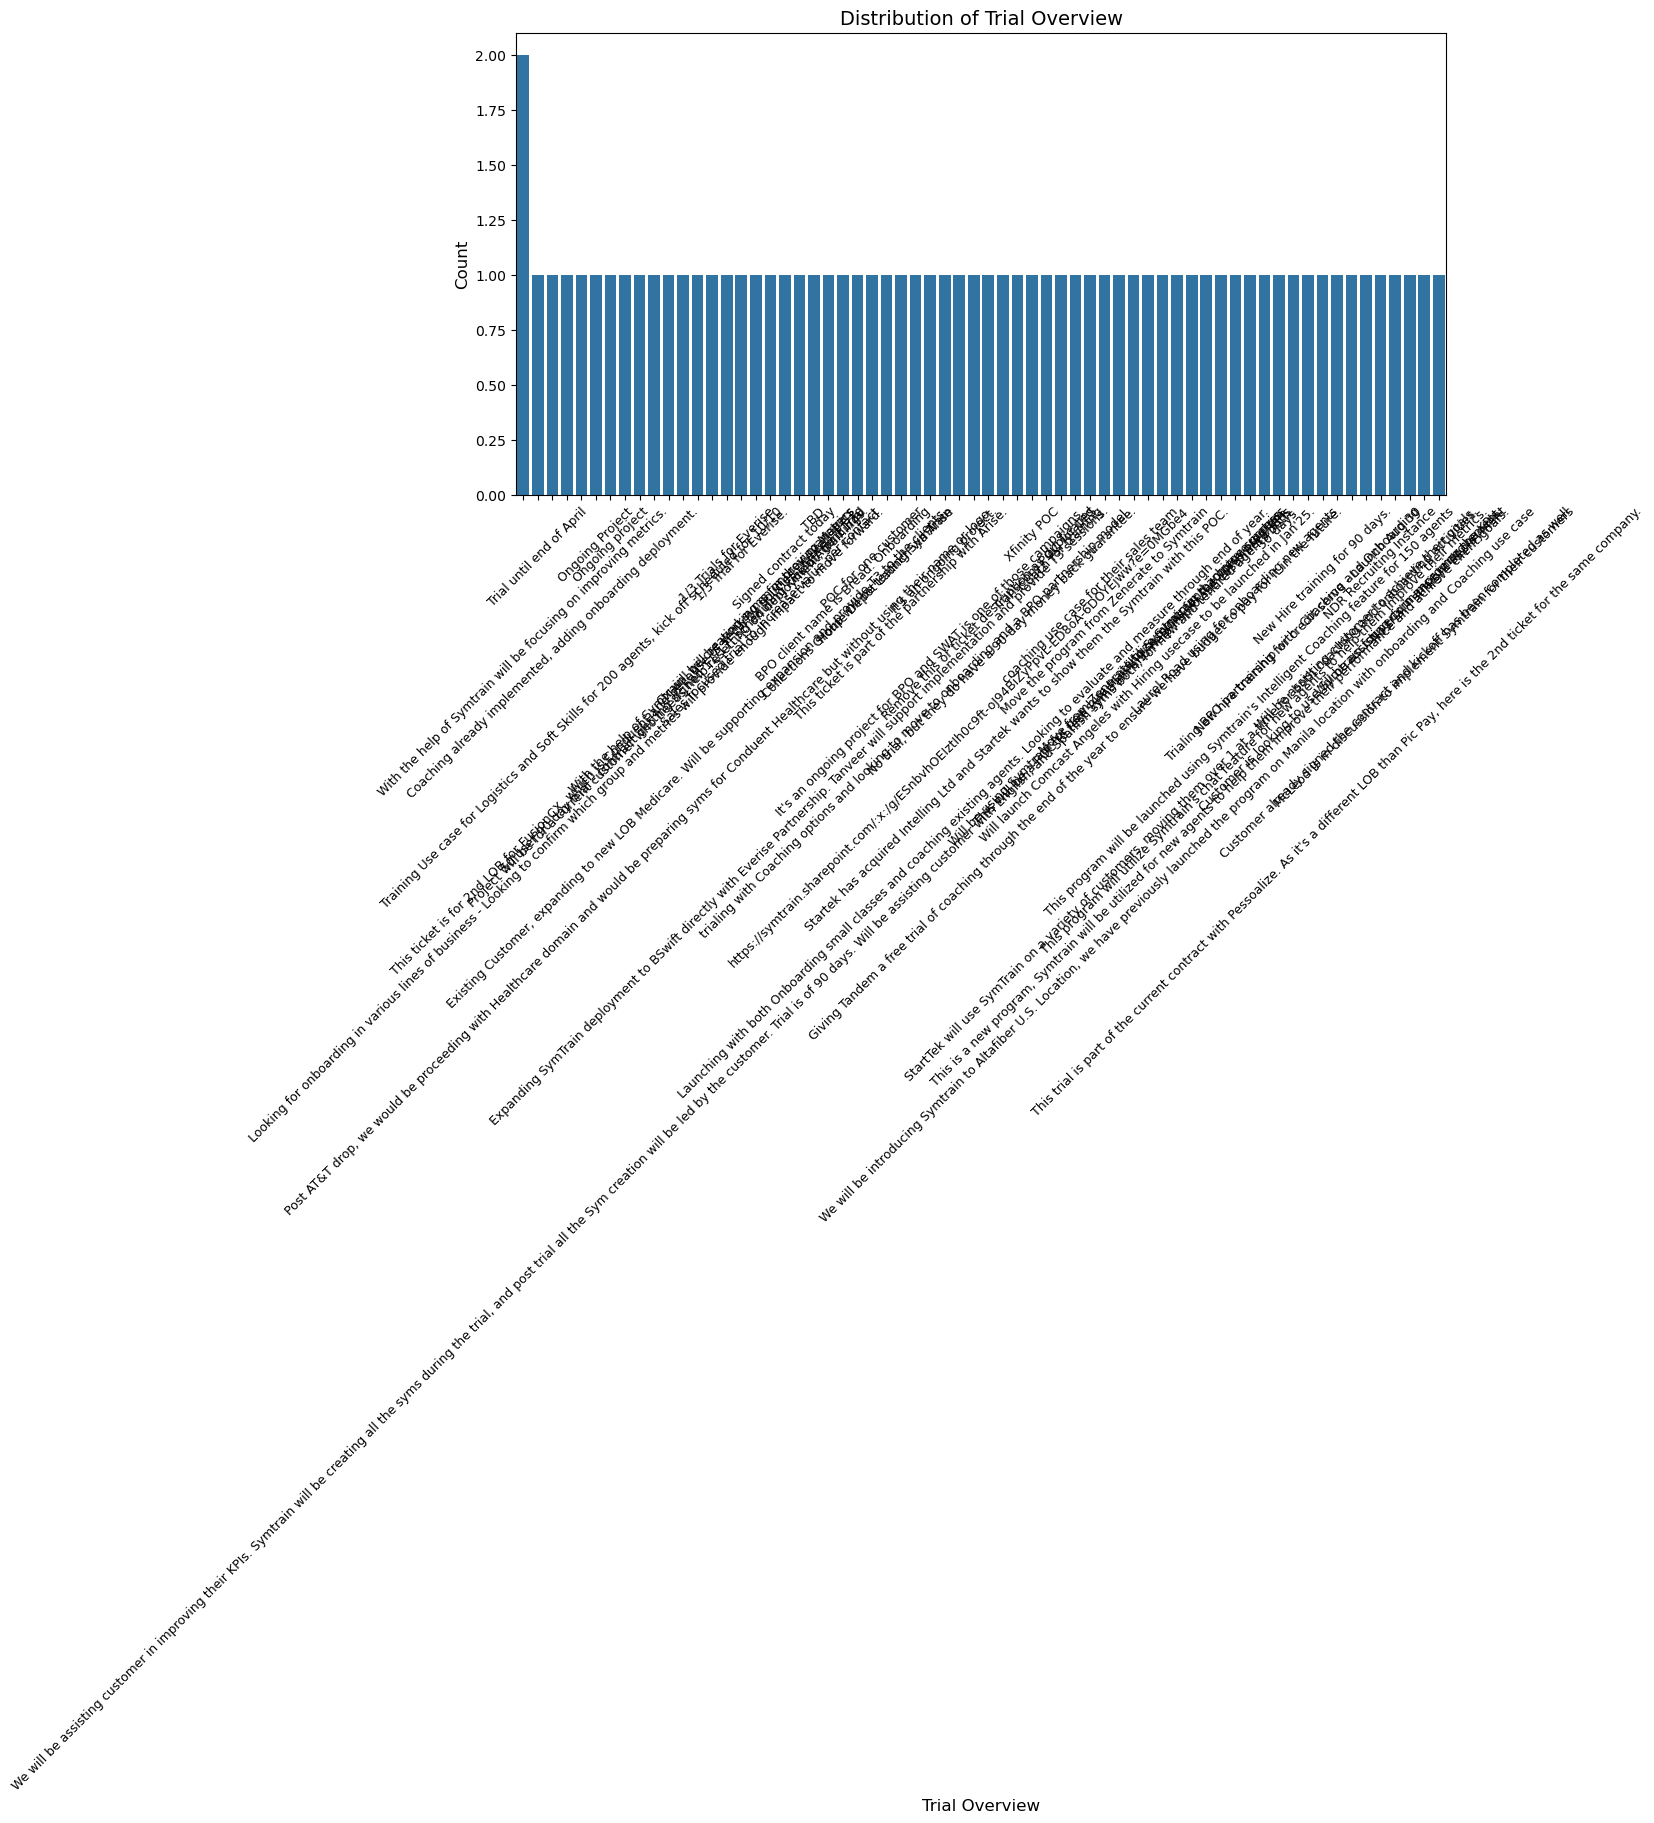

In [11]:
# Histograms for categorical variables 
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_cleaned, x=col, order=df_cleaned[col].value_counts().index)
    plt.xticks(rotation=45, fontsize=9)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

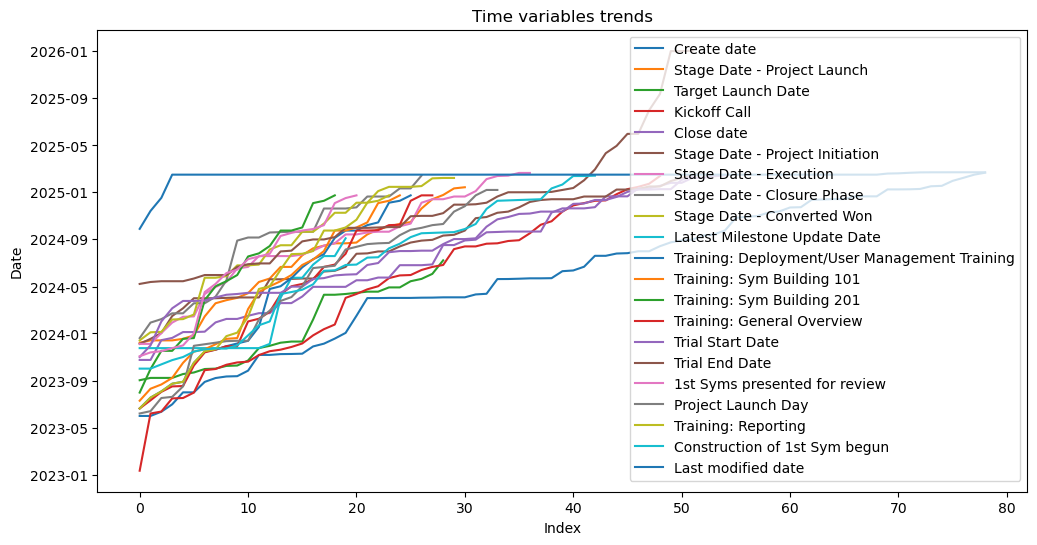

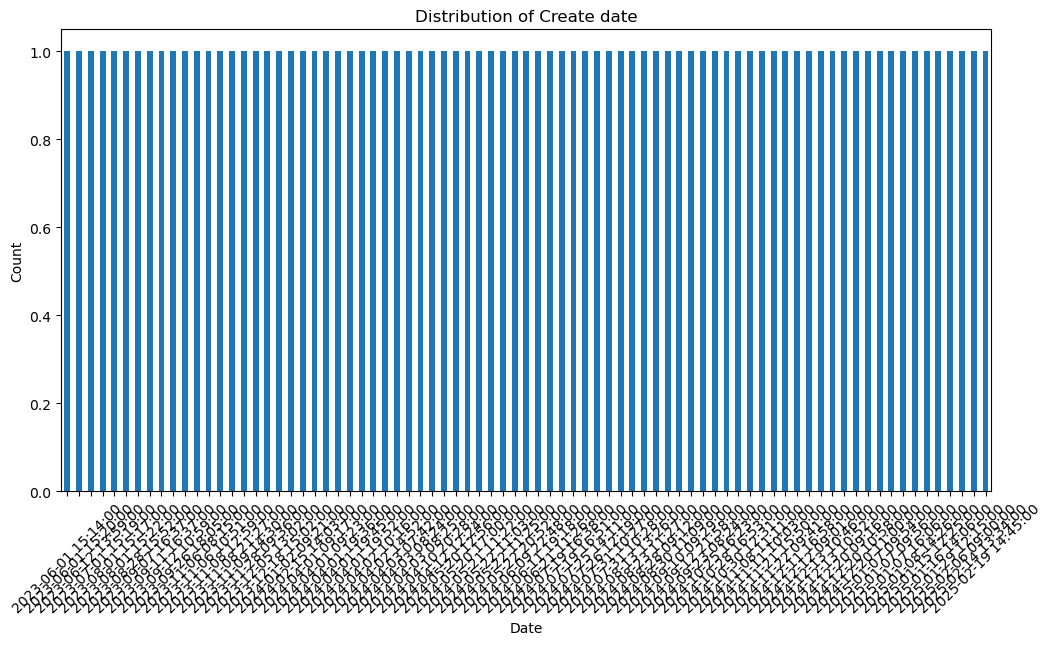

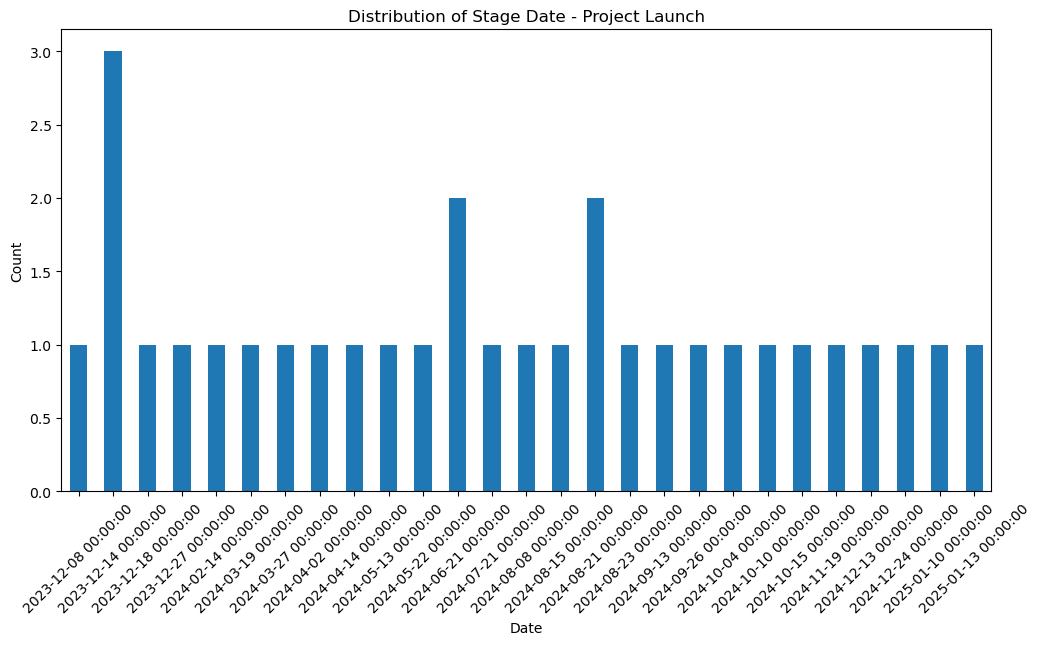

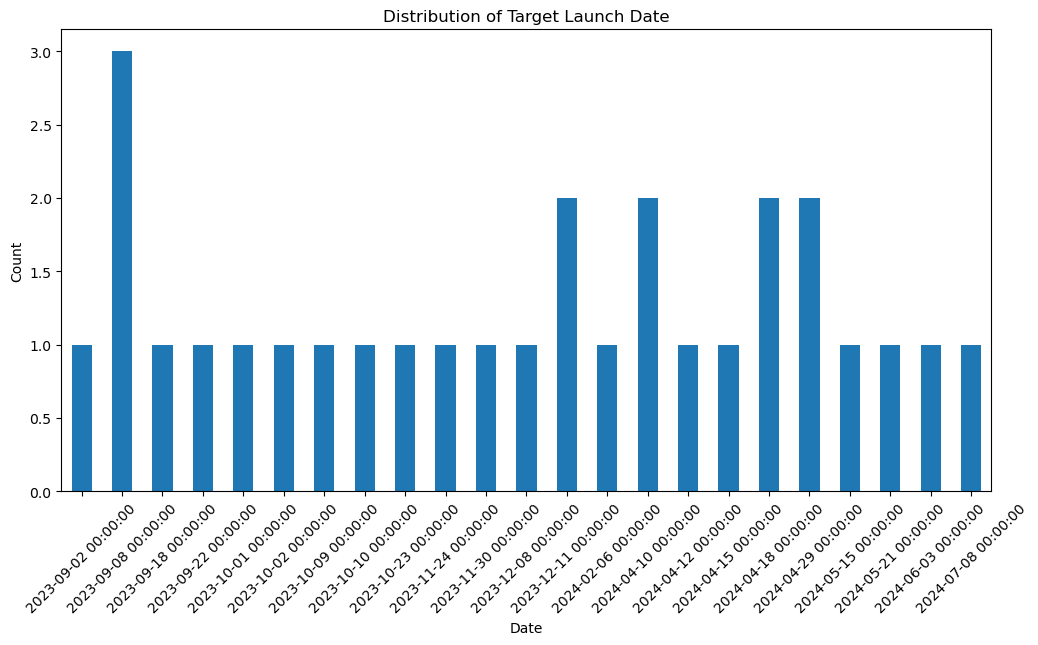

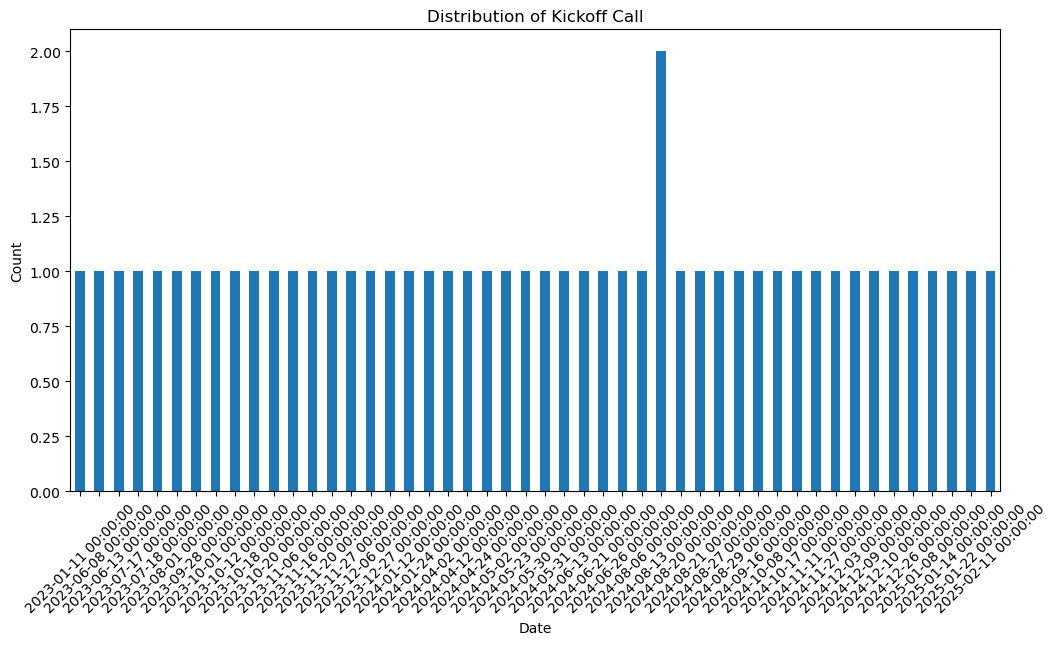

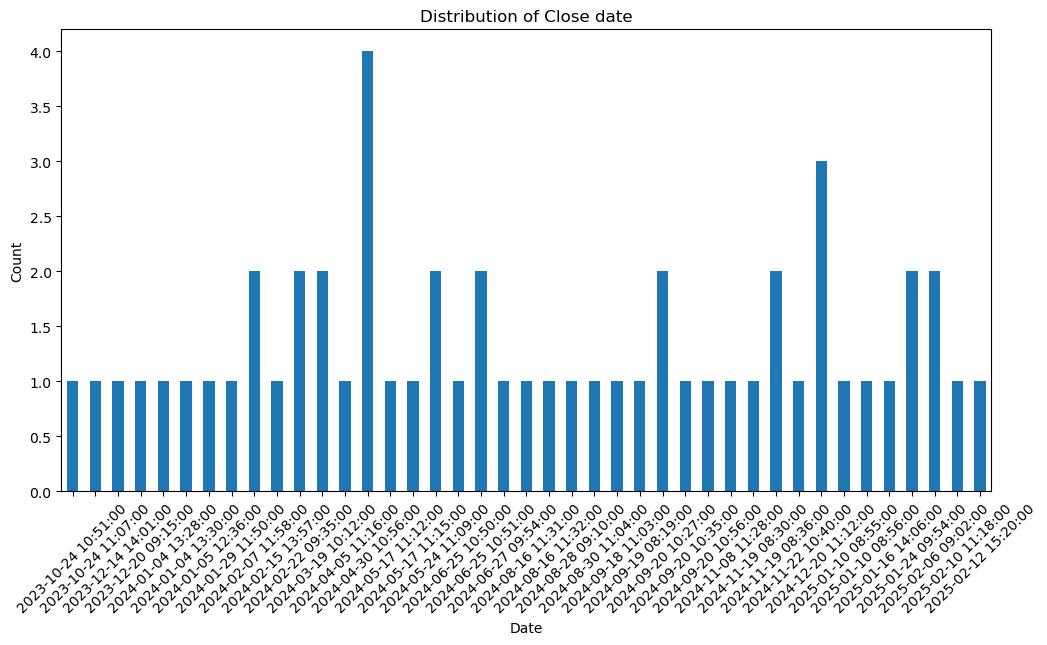

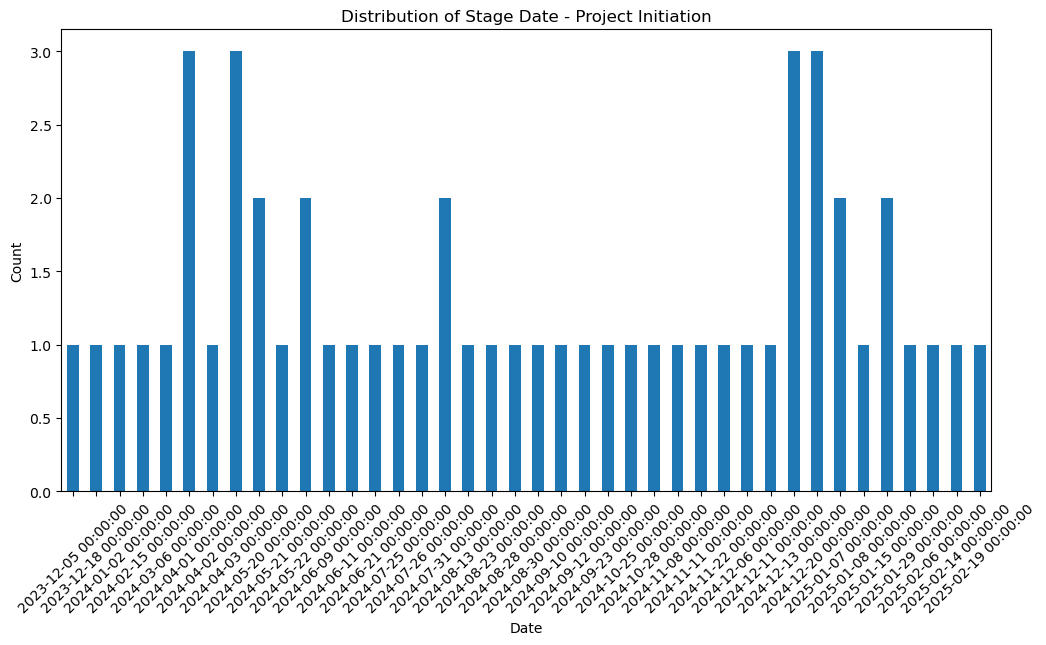

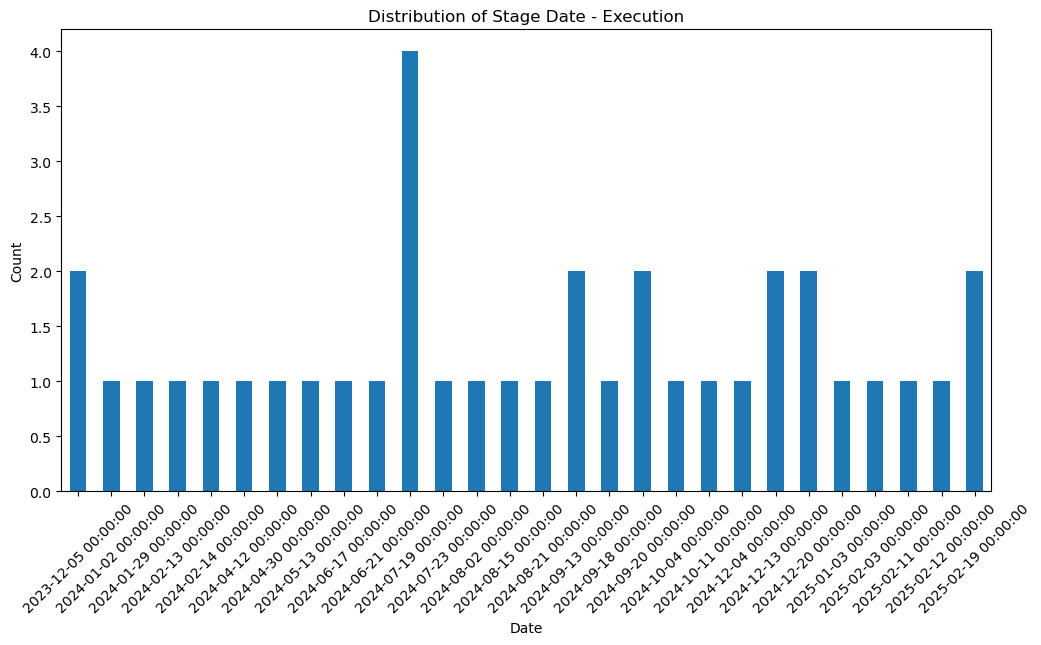

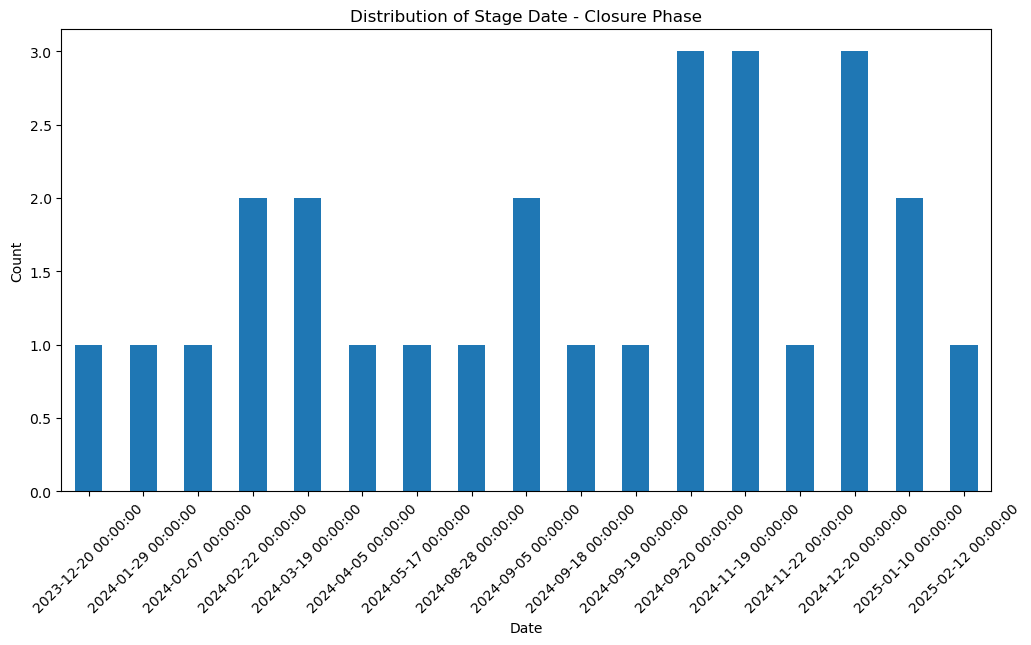

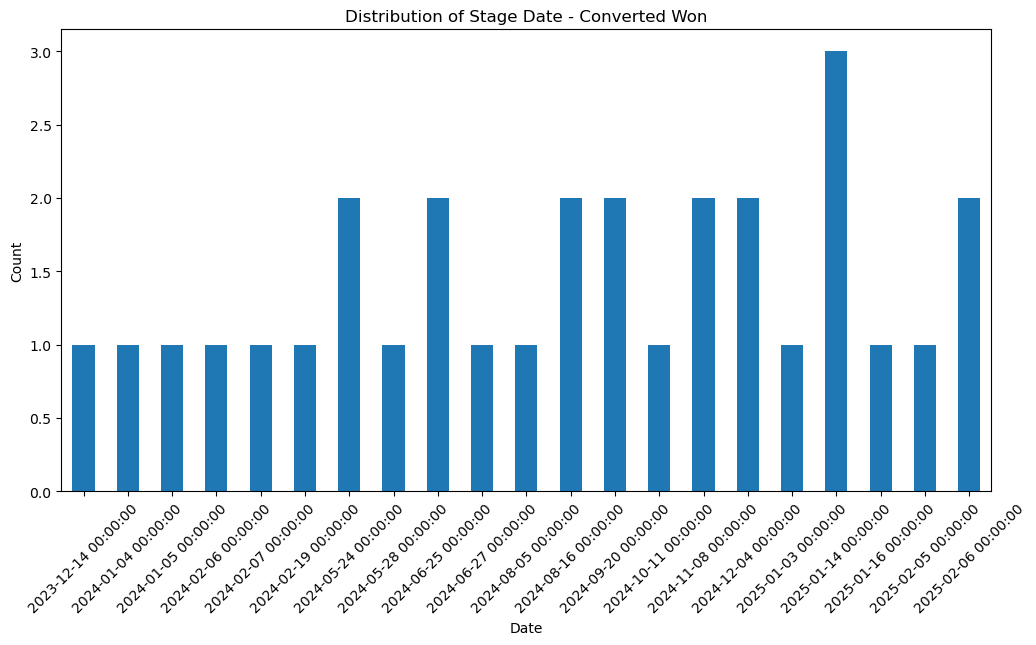

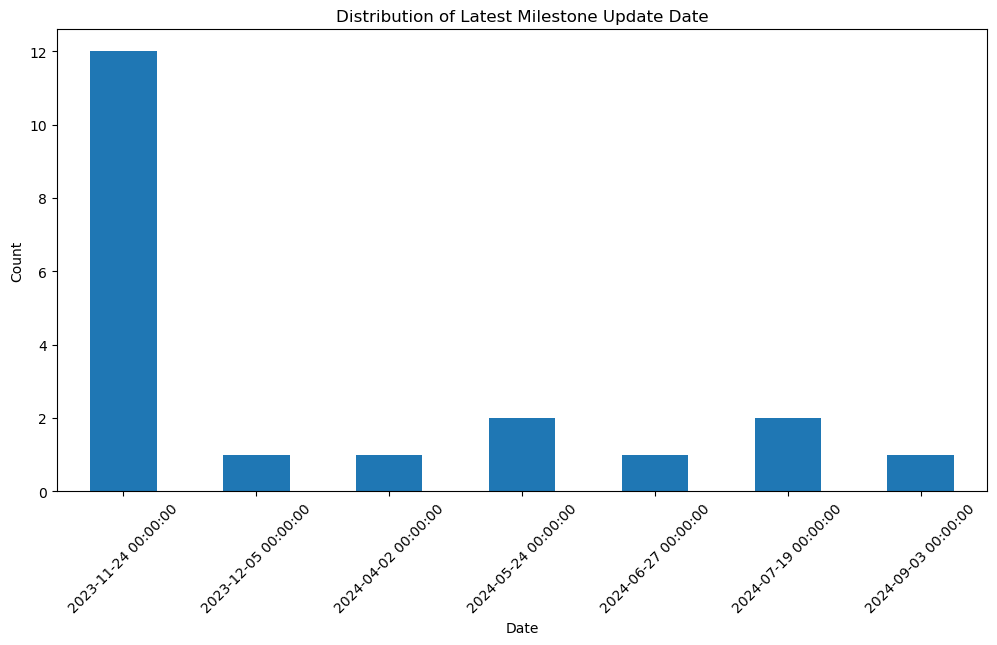

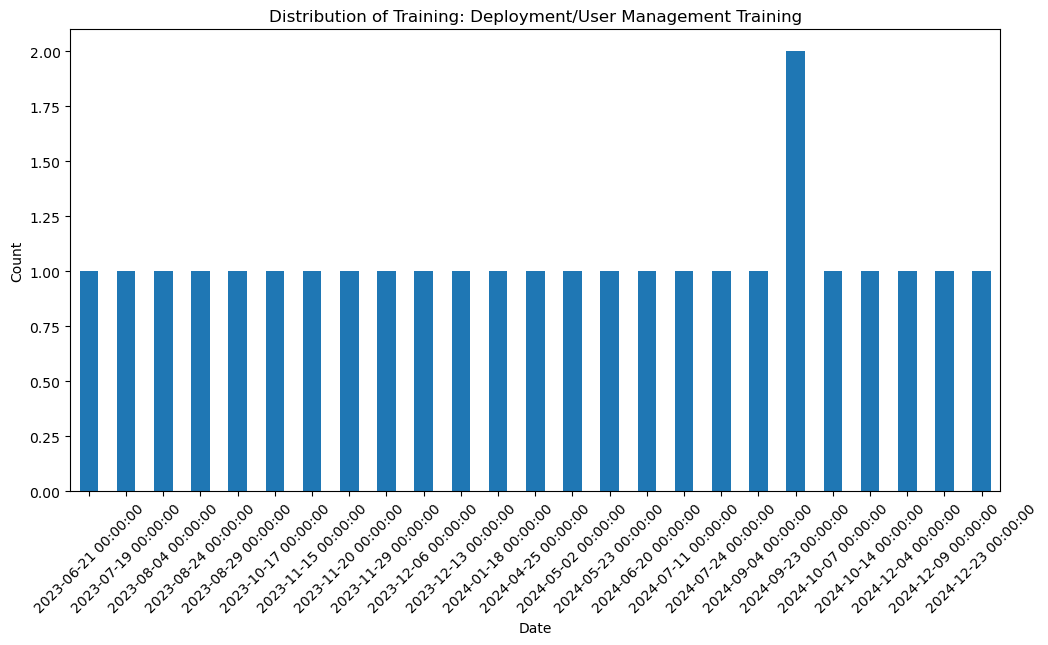

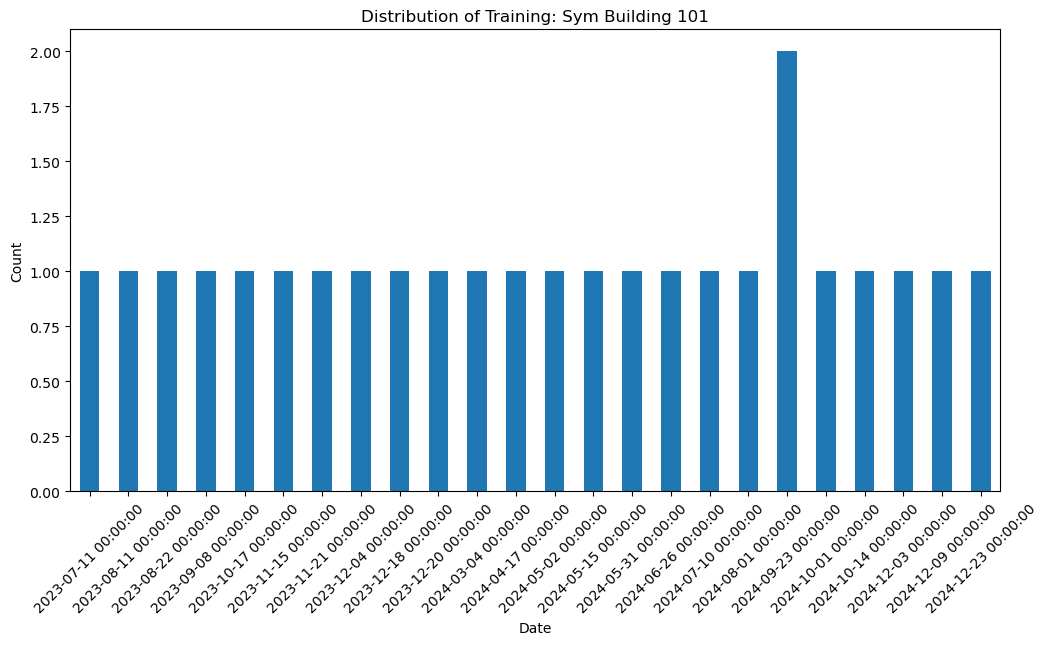

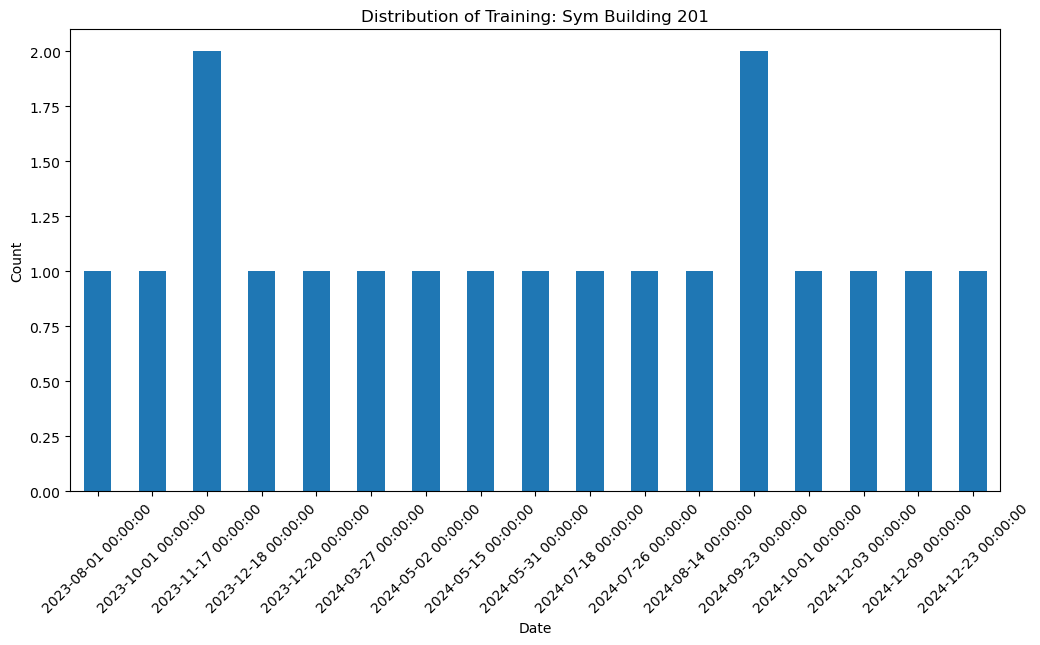

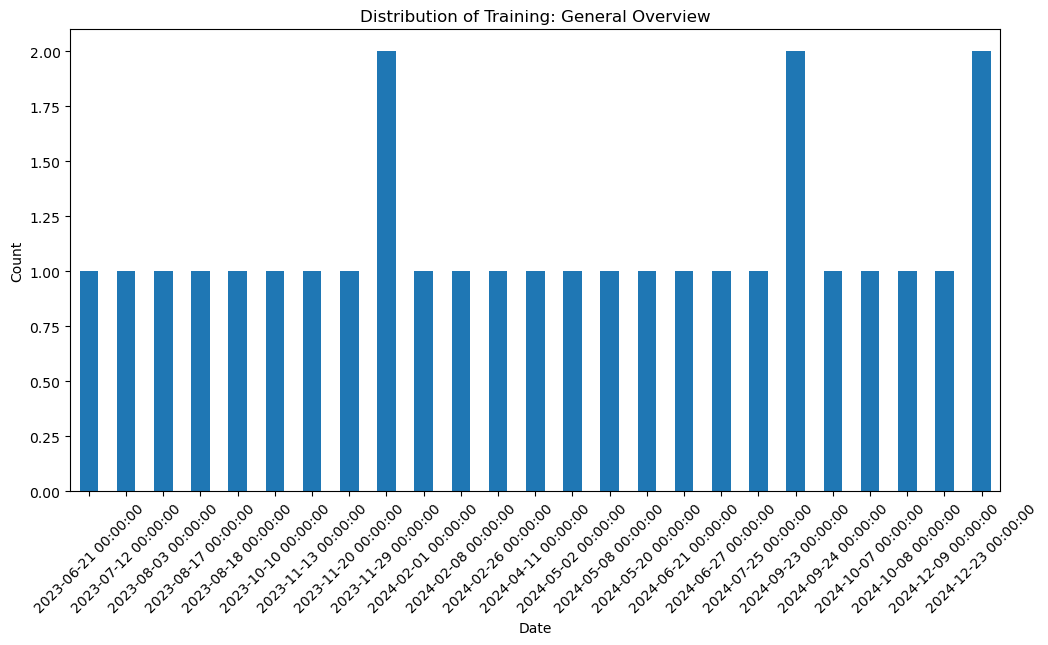

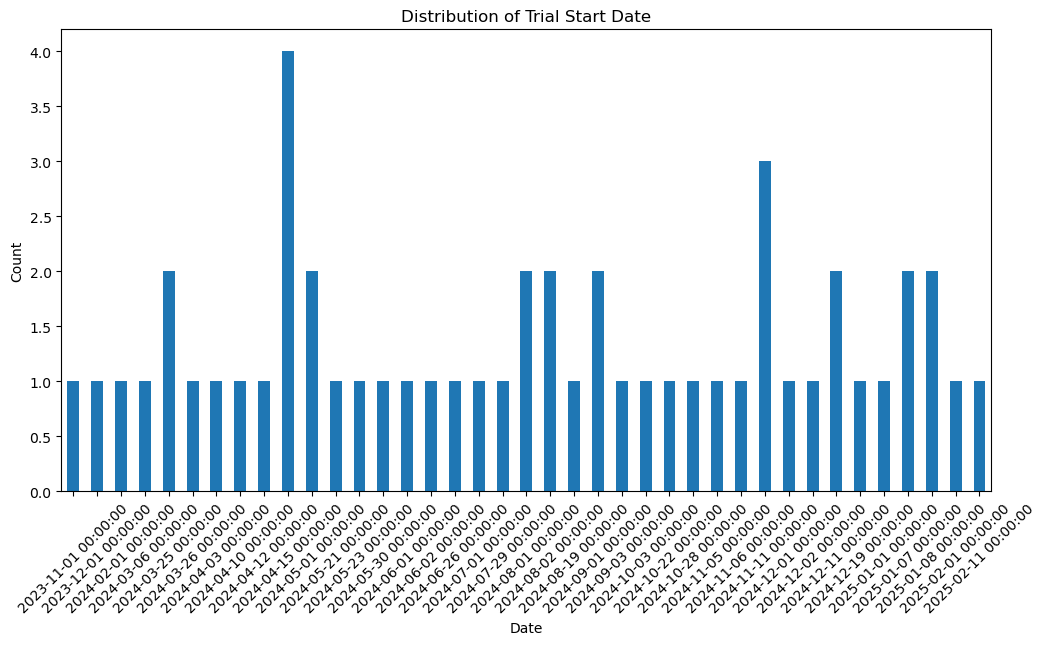

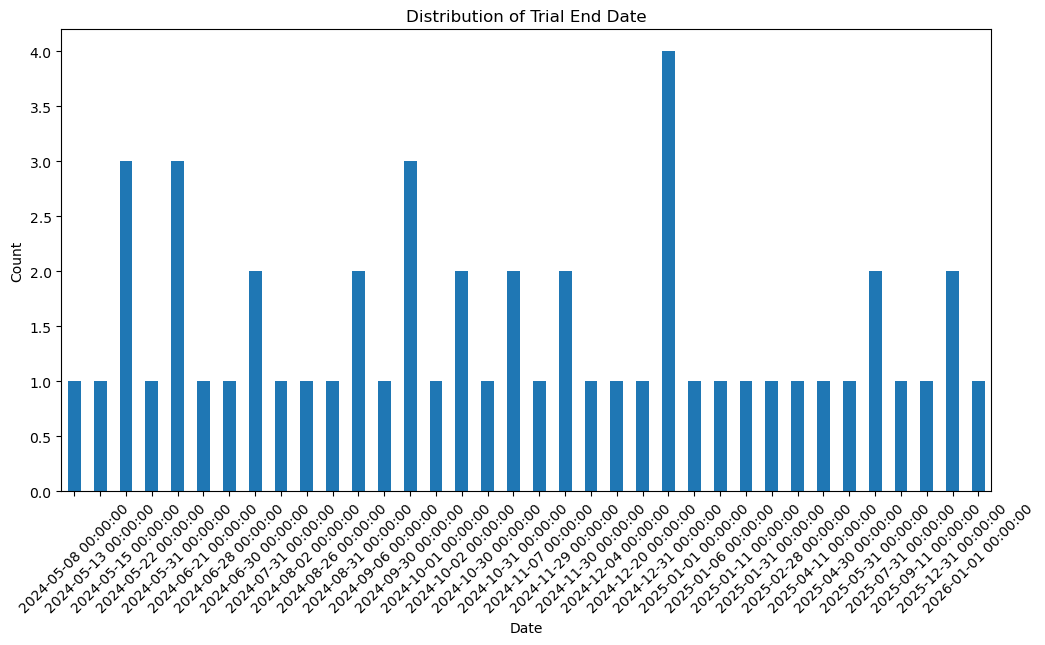

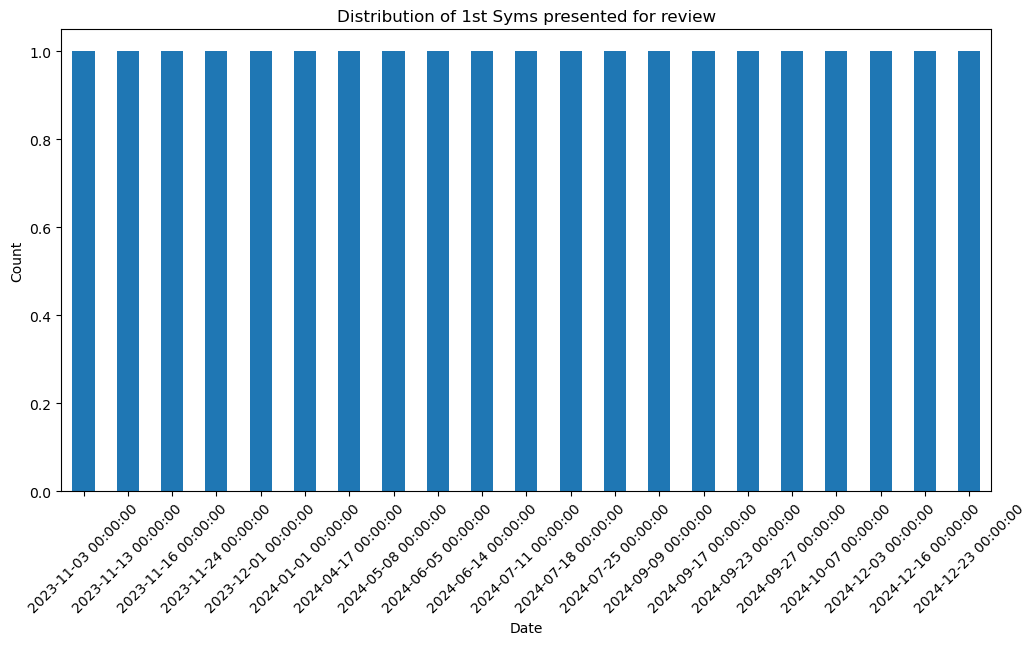

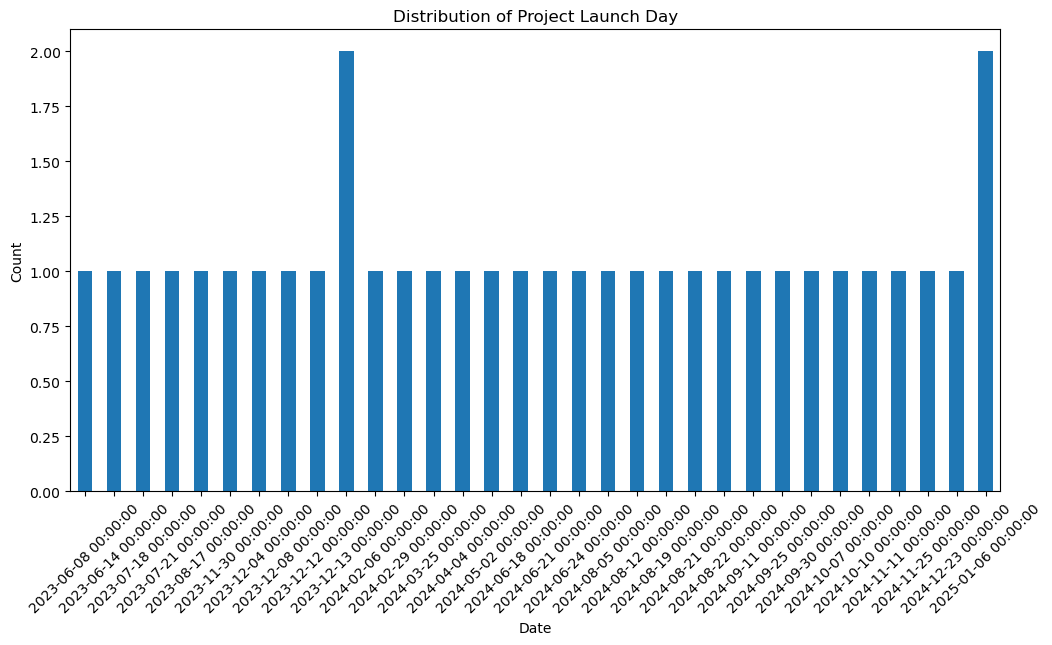

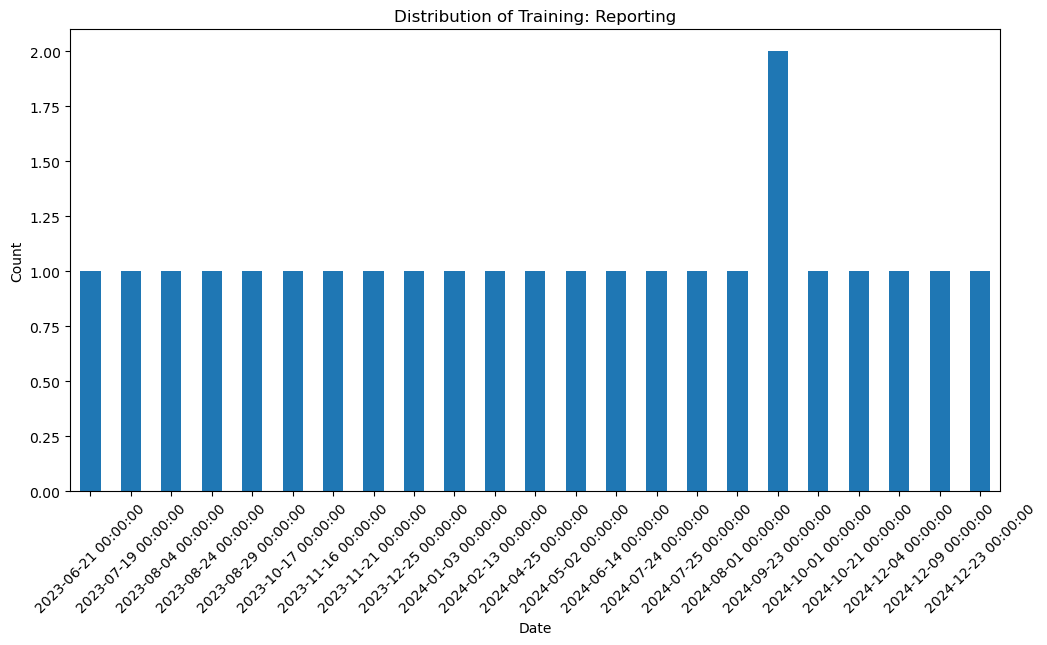

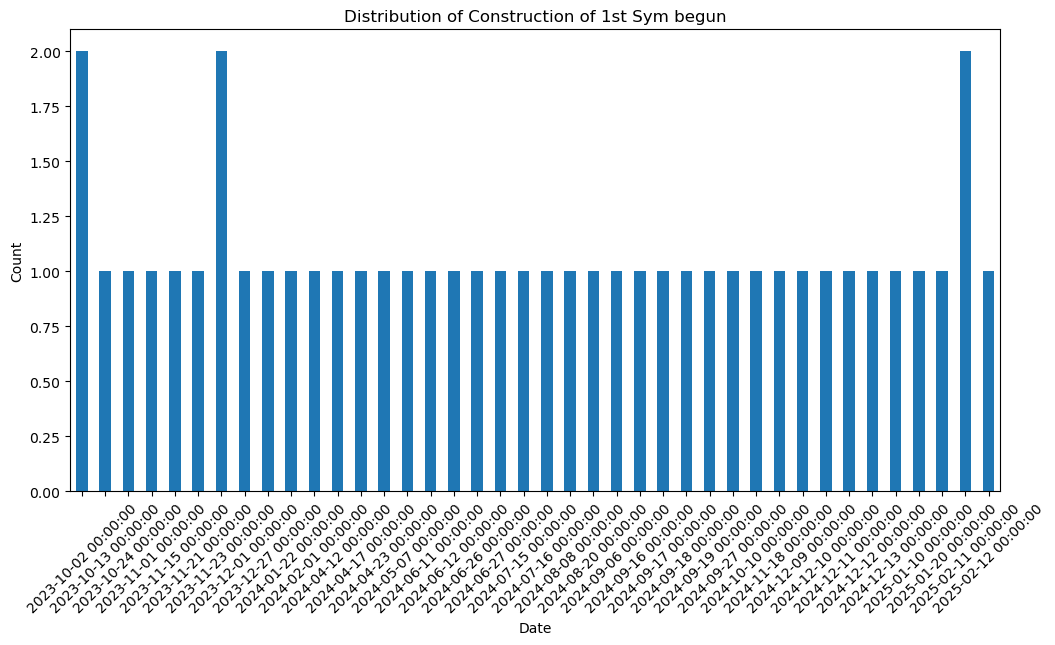

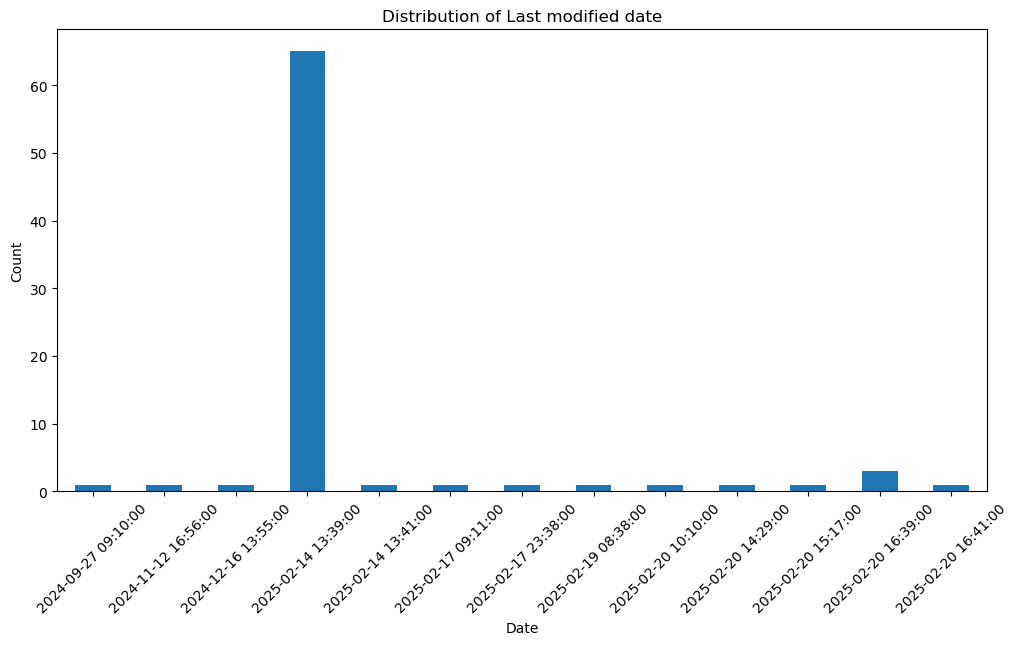

In [12]:
# Bar plots for time series data 
plt.figure(figsize=(12,6))
for col in date_cols:
    if col in df_cleaned.columns:
        df_cleaned[col].dropna().sort_values().reset_index(drop=True).plot(label=col)
plt.legend()
plt.xlabel("Index")
plt.ylabel("Date")
plt.title("Time variables trends")
plt.xticks(rotation=0)
plt.show()

for col in date_cols:
    if col in df_cleaned.columns:
        plt.figure(figsize=(12,6))
        df_cleaned[col].value_counts().sort_index().plot(kind='bar')
        plt.xlabel("Date")
        plt.ylabel("Count")
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()


### Outlier or missing value analysis 

In [13]:
print(df_cleaned.isnull().sum())

Create date                                       0
Stage Date - Project Launch                      48
Associated Contact                                1
Target Launch Date                               50
Kickoff Call                                     30
Close date                                       24
Pipeline                                          0
Stage Date - Project Initiation                  26
Ticket status                                     0
Stage Date - Execution                           42
Time to first agent email reply (HH:mm:ss)       23
Associated Company                                0
Stage Date - Closure Phase                       52
Associated Company (Primary)                      3
Response time (HH:mm:ss)                         23
Ticket ID                                         0
Time to close (HH:mm:ss)                         24
Associated Deal                                  21
Library index approved                           36
Training: Ge

In [14]:
# Missing values
missing_values = df_cleaned.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df_cleaned)) * 100
df_missing = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(df_missing[df_missing['Missing Values'] > 0])

,Missing Values,Percentage
Training: Sym Building 201,60,75.949367
Latest Milestone Update Date,59,74.683544
Latest Milestone,59,74.683544
1st Syms presented for review,58,73.417722
Training: Reporting,55,69.620253
Training: Sym Building 101,54,68.354430
Training: Deployment/User Management Training,53,67.088608
Stage Date - Closure Phase,52,65.822785
Training: General Overview,51,64.556962
Target Launch Date,50,63.291139
